# Tutorial: Training Data Generation for Projection Upsampling Network

## Overview
This notebook presents a comprehensive walkthrough of the training data generation process for 2D SIM reconstruction. The approach focuses on generating paired datasets consisting of noisy inputs and corresponding high-quality SIM reconstruction images derived from 3D raw microscope data.

## Objectives
- **Dataset Creation:** Develop pairs comprising noisy raw images and ground-truth images obtained with high signal-to-noise ratio (SNR).
- **Data Source:** Utilize the Microtubules dataset from BioSR for demonstration purposes. More details can be found at the [BioSR website](https://figshare.com/articles/dataset/BioSR/13264793).
- **Dataset Size:** For the demonstration, a small dataset with 5 patches per sample is generated. In practical scenarios, a larger dataset is recommended.
- **Tool Utilization:** Employ the CSBDeep library to streamline the data generation process. More information is available on the [CSBDeep documentation](https://csbdeep.bioimagecomputing.com/doc/).

## Steps
1. **Data Preparation:** Process the raw 3D noisy microscope data.
2. **Pair Generation:** Create paired samples, aligning noisy data with corresponding ground-truth SIM reconstruction images.
3. **Data Augmentation:** Apply augmentation techniques to enhance dataset variability and robustness. (saves on disk)
4. **Analysis and Validation:** Assess the quality of generated pairs using visualization and statistical metrics.

## Conclusion
This structured guide details the procedures for generating training data essential for developing projection upsampling networks, specifically optimized for 2D SIM reconstruction tasks.

In [ ]:

# install the projection_upsampling_network package if already not installed

%pip install git+https://github.com/ArghaSarker/RDL_denoising.git


In [17]:


import numpy as np
import matplotlib.pyplot as plt 
from rdl_denoising.data_gen import create_folders_SR, create_patches_reduced_target, RawDataScaled
from csbdeep.utils import plot_some
import ipywidgets as widgets

import os
from rdl_denoising.augmentation import flip_up_down, flip_left_right, transpose,  rotate_90, rotate_180, rotate_270



### Data Stracture

- Place your data inside the "dataset" folder. 
- Divide it into three separate folders: train, test, and validation. 
- Each folder should contain files organized by cell (e.g., Cell_xx → files).




### Create Validation Dataset
- we isolate training, testing and validation cells completely for make sure the data is unique. 
- Note: the number of patches are much smaller as we are creating a very small dataset for tutorial purpose only. 
- for real training, the number of patches needs to be much larger

In [6]:


root_dir = '../dataset/microtubules/train'
create_folders_SR(root_dir, gt_filename="SIM_gt",
    raw_filename="RawSIMData_level_02")

# define parameter for creating image patches
scale_gt = 2.0
patch_size = 256 
n_patches_per_image = 5

# create image patches for trainig . 
raw_data = RawDataScaled.from_folder (
    basepath    = f'{root_dir}/Train/SR',
    source_dirs = ['Raw'],
    target_dir  = 'GT',
    scale_gt = scale_gt,
    axes        = 'ZYX' # z : channel , y : hight , x : width

)


X, Y, XY_axes = create_patches_reduced_target (
    raw_data            = raw_data,
    patch_size          = (None,patch_size,patch_size),
    n_patches_per_image = n_patches_per_image,
    target_axes         = 'YX',
    reduction_axes      = 'Z',
    scale_gt = scale_gt,
    save_file           = f'{root_dir}/Train/SR/microtubules_SR_trainig.npz',
    dfcan_data=True, # since we are preparing data for dfcan, it expects data as 128x128x9 
)
# Use os.path.join for path concatenation to avoid errors
raw_folder_path = os.path.join(root_dir, 'Train', 'SR', 'Raw')
gt_folder_path = os.path.join(root_dir, 'Train', 'SR', 'GT')

# Count files in Raw and GT folders
files_Raw = os.listdir(raw_folder_path)
print(f"Number of files in Raw Folder: {len(files_Raw)}")

files_GT = os.listdir(gt_folder_path)
print(f"Number of files in GT Folder: {len(files_GT)}")

    5 raw images x    1 transformations   =     5 images
    5 images     x    5 patches per image =    25 patches in total
Input data:
../dataset/microtubules/train/Train/SR: target='GT', sources=['Raw'], axes='ZYX', pattern='*.tif*'
Transformations:
1 x Broadcast target image to the shape of source
128 x 128
Patch size:
9 x 128 x 128


100%|██████████| 5/5 [00:37<00:00,  7.51s/it]


Saving data to ../dataset/microtubules/train/Train/SR/microtubules_SR_trainig.npz.
Number of files in Raw Folder: 5
Number of files in GT Folder: 5


### Create Validation Dataset
- Note: the number of patches are much smaller as we are creating a very small dataset for tutorial purpose only. 
- for real training, the number of patches needs to be much larger

In [18]:


root_dir = '../dataset/microtubules/val'
create_folders_SR(root_dir, gt_filename="SIM_gt",
    raw_filename="RawSIMData_level_02")

# define parameter for creating image patches
scale_gt = 2.0
patch_size = 256 
n_patches_per_image = 5

# create image patches for trainig . 
raw_data = RawDataScaled.from_folder (
    basepath    = f'{root_dir}/Train/SR',
    source_dirs = ['Raw'],
    target_dir  = 'GT',
    scale_gt = scale_gt,
    axes        = 'ZYX' # z : channel , y : hight , x : width

)


X_val, Y_val, XY_axes_val = create_patches_reduced_target (
    raw_data            = raw_data,
    patch_size          = (None,patch_size,patch_size),
    n_patches_per_image = n_patches_per_image,
    target_axes         = 'YX',
    reduction_axes      = 'Z',
    scale_gt = scale_gt,
    save_file           = f'{root_dir}/Train/SR/microtubules_SR_trainig.npz',
    dfcan_data=True,
)
# Use os.path.join for path concatenation to avoid errors
raw_folder_path_val = os.path.join(root_dir, 'Train', 'SR', 'Raw')
gt_folder_path_val = os.path.join(root_dir, 'Train', 'SR', 'GT')

# Count files in Raw and GT folders
files_Raw = os.listdir(raw_folder_path_val)
print(f"Number of files in Raw Folder: {len(files_Raw)}")

files_GT = os.listdir(gt_folder_path_val)
print(f"Number of files in GT Folder: {len(files_GT)}")

    3 raw images x    1 transformations   =     3 images
    3 images     x    5 patches per image =    15 patches in total
Input data:
../dataset/microtubules/val/Train/SR: target='GT', sources=['Raw'], axes='ZYX', pattern='*.tif*'
Transformations:
1 x Broadcast target image to the shape of source
128 x 128
Patch size:
9 x 128 x 128


100%|██████████| 3/3 [00:23<00:00,  7.85s/it]


Saving data to ../dataset/microtubules/val/Train/SR/microtubules_SR_trainig.npz.
Number of files in Raw Folder: 3
Number of files in GT Folder: 3


In [13]:
print(' Information regarding training data')
print('----------------------------------')
print("shape of Input  Image  : X ", X.shape) 
print("shape of Ground Truth Image : Y ", Y.shape) 
print("axes  of X , Y ", XY_axes) 
print()
print('information regarding validation data')
print('----------------------------------')
print("shape of Input  Image  : X_val ", X_val.shape)
print("shape of Ground Truth Image : Y_val ", Y_val.shape)
print("axes  of X_val , Y_val ", XY_axes_val)


 Information regarding training data
----------------------------------
shape of Input  Image  : X  (25, 128, 128, 9)
shape of Ground Truth Image : Y  (25, 256, 256, 1)
axes  of X , Y  SYXC

information regarding validation data
----------------------------------
shape of Input  Image  : X_val  (15, 1, 9, 128, 128)
shape of Ground Truth Image : Y_val  (15, 1, 1, 256, 256)
axes  of X_val , Y_val  SCZYX


## Visualization of the Image Patches

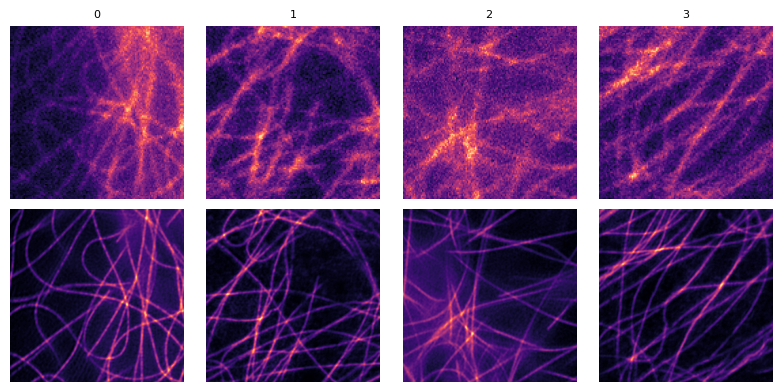

In [ ]:
def plot_patches(X, Y, start_index=0, num_slice=4):
    sl = slice(start_index, start_index + num_slice)
    plt.figure(figsize=(8, 4))
    
    plot_some(X[sl][...,1], Y[sl], title_list=[np.arange(sl.start, sl.stop)])
    plt.tight_layout()
    plt.show()

plot_patches(X, Y, start_index=0, num_slice=4)
